In [1]:
#import statements
import os

from matplotlib.colors import ListedColormap
from xarray.backends.api import open_datatree
import cartopy.crs as ccrs
import cmocean
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
# Get the float positions
file_path = "//home/jovyan/shared-public/FLARP/Data/float_profile_info.csv"
# Read the CSV file
data = pd.read_csv(file_path)#), usecols=['CRUISE', 'LON', 'LAT', 'PRES', 'CHLA', 'CHL_470', 'date'])

In [9]:
#See the data details
data

,Date_DateTime,Date_DateStr,SDN,CRUISE,STATION,LON,LAT,date,lon_W
0,2024-03-01 13:16:09.024584,2024-03-01,739312.552882,1902601,49,-24.646950,11.746242,2024-16-01,-24.646950
1,2024-03-10 13:06:09.024368,2024-03-10,739321.545938,1902601,50,-24.391783,11.867962,2024-06-10,-24.391783
2,2024-03-19 13:14:09.024490,2024-03-19,739330.551493,1902601,51,-24.256904,11.705094,2024-14-19,-24.256904
3,2024-03-28 13:04:09.024265,2024-03-28,739339.544549,1902601,52,-24.250853,11.510640,2024-04-28,-24.250853
4,2024-04-02 13:08:13.021754,2024-04-02,739344.547373,1902601,53,-24.309357,11.512137,2024-08-02,-24.309357
...,...,...,...,...,...,...,...,...,...
344,2024-07-17 15:28:20.518578,2024-07-17,739450.644682,7901124,47,-65.308929,71.763164,2024-28-17,-65.308929
345,2024-07-22 15:34:23.337149,2024-07-22,739455.648881,7901124,48,-65.270906,71.752465,2024-34-22,-65.270906
346,2024-07-27 15:32:39.150498,2024-07-27,739460.647675,7901124,49,-65.232923,71.741778,2024-32-27,-65.232923
347,2024-08-01 15:51:54.977904,2024-08-01,739465.661053,7901124,50,-65.194655,71.731010,2024-51-01,-65.194655


In [3]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_RRS_NRT",
    granule_name="*.MO.*.0p1deg.*",
)
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
paths

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240301_20240331.L3m.MO.RRS.V2_0.Rrs.0p1deg.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V2_0.Rrs.0p1deg.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.RRS.V2_0.Rrs.0p1deg.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.RRS.V2_0.Rrs.0p1deg.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240701_20240731.L3m.MO.RRS.V2_0.Rrs.0p1deg.NRT.nc>]

In [5]:
# Select the last image
dataset = xr.open_dataset(paths[-1])

In [6]:
# Select a specific wavelength, or can add multiple
#dataset["Rrs"].sel({"wavelength": [645]})

In [7]:
# Select all wavelengths
dataset["Rrs"].sel

<bound method DataArray.sel of <xarray.DataArray 'Rrs' (lat: 1800, lon: 3600, wavelength: 184)> Size: 5GB
[1192320000 values with dtype=float32]
Coordinates:
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 7kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon         (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000
    display_scale:  linear
    display_min:    0.0
    display_max:    0.025>

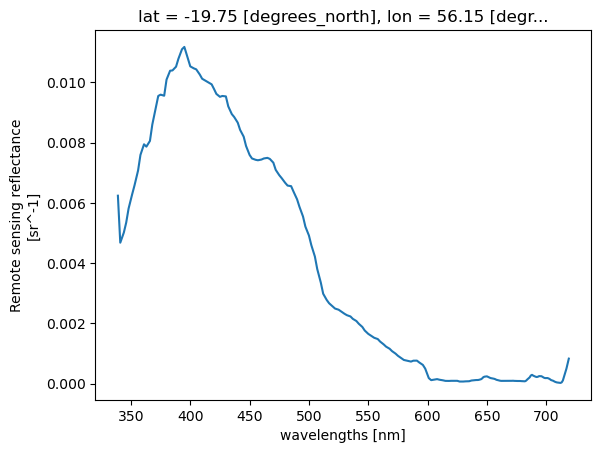

In [10]:
# To select a pixel based on lat and lon, use sel, though does not plot anything
#	LON	LAT	-19.7300251666667	56.1586873333333
dataset["Rrs"].sel({"lat": -19.73, 'lon': 56.16},method='nearest').plot()

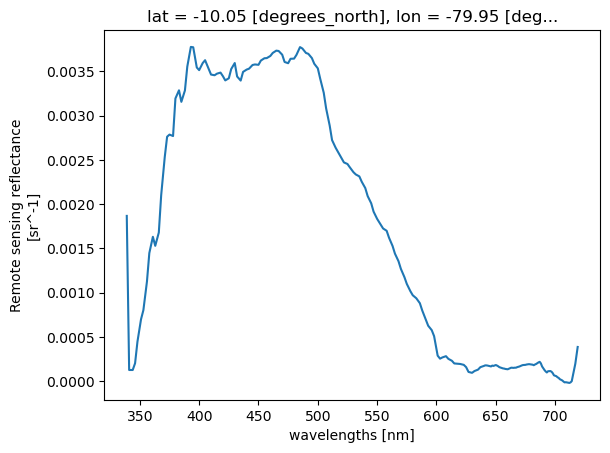

In [28]:
# To select a pixel based on the lat lon indeces, use isel
dataset["Rrs"].isel({"lat": 1000, 'lon': 1000}).plot()